# Primer intento de SOM

## Primero revisaremos si funciona para detectar clusters

In [4]:
from IPython.display import Image, display

from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
from hyperopt import fmin, tpe, hp


import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot,axis,show,pcolor,colorbar,bone


In [1]:
som_grid_rows = 6
som_grid_columns = 6
iterations = 500
sigma = 2
learning_rate = .1

In [5]:
data, target = load_breast_cancer(True)

/home/sergio/miniconda3/envs/py3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [6]:
data.shape, target.shape

((569, 30), (569,))

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler()

In [8]:
data_sc = sc.fit_transform(data)
data_sc.shape

(569, 30)

In [12]:
?MiniSom

Init signature:
MiniSom(
    x,
    y,
    input_len,
    sigma=1.0,
    learning_rate=0.5,
    decay_function=<function asymptotic_decay at 0x7fc82850e730>,
    neighborhood_function='gaussian',
    topology='rectangular',
    activation_distance='euclidean',
    random_seed=None,
)
Docstring:      <no docstring>
Init docstring:
Initializes a Self Organizing Maps.

A rule of thumb to set the size of the grid for a dimensionality
reduction task is that it should contain 5*sqrt(N) neurons
where N is the number of samples in the dataset to analyze.

E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
hence a map 8-by-8 should perform well.

Parameters
----------
x : int
    x dimension of the SOM.

y : int
    y dimension of the SOM.

input_len : int
    Number of the elements of the vectors in input.

sigma : float, optional (default=1.0)
    Spread of the neighborhood function, needs to be adequate
    to the dimensions of the map.
    (at the iteration t we have sigma(t) = sigma

In [14]:
som = MiniSom(x=som_grid_rows,
             y=som_grid_columns,
             input_len = data_sc.shape[1],
             sigma=sigma, topology = 'hexagonal',
             learning_rate=learning_rate)
som.random_weights_init(data)

In [15]:
# entrenamiento

inicial = time.time()

som.train_random(data,iterations)

final = time.time() - inicial

print(final)

0.027622222900390625


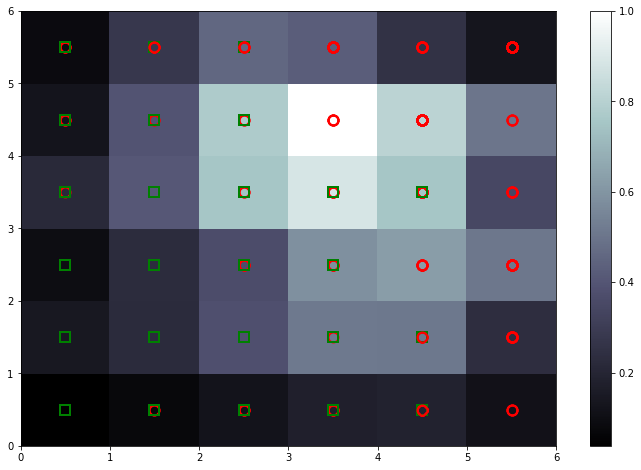

In [16]:
plt.figure(figsize=((12,8)))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors=['r','g']
for i, x in enumerate(data):
    w = som.winner(x)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()


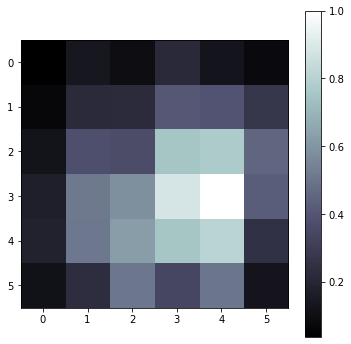

In [17]:
plt.figure(figsize=((6,6)))
plt.imshow(som.distance_map())
plt.colorbar()

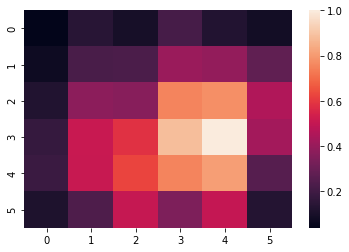

In [18]:
sns.heatmap(som.distance_map())

In [13]:
mappings=som.win_map(data)
len(mappings), type(mappings)

(297, collections.defaultdict)

In [14]:
#mappings

In [19]:
#detecciones = np.concatenate([mappings[(1,1)], mappings[(1,8)]])
#detecciones

In [20]:
#sc.inverse_transform(detecciones)

In [22]:
dataset = load_breast_cancer()
target= dataset.target
target_names = dataset.target_names
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.index.name = "SampleID"

In [23]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
SampleID,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


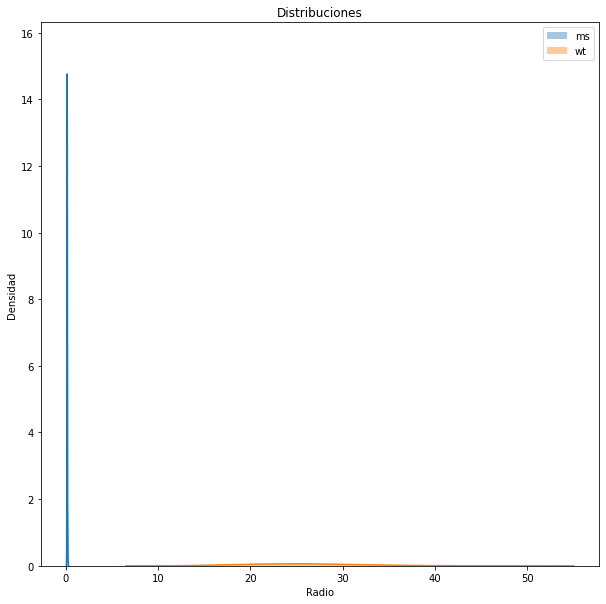

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(data.loc[:,"mean symmetry"], label="ms")
sns.distplot(data.loc[:,"worst texture"], label="wt")
plt.title("Distribuciones")
plt.legend()
plt.xlabel("Radio")
plt.ylabel("Densidad")
plt.show()

In [25]:
x = 10
y=10
input_len = data.shape[1]

sigma = 2

learning_rate = 5

iterations = 200


In [26]:
data = np.array(data)
som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              sigma=sigma,
              learning_rate=learning_rate)

som.random_weights_init(data)

In [27]:
inicial = time.time()

som.train_random(data, iterations)

final= time.time()- inicial

print(final, "s")

0.026813983917236328 s


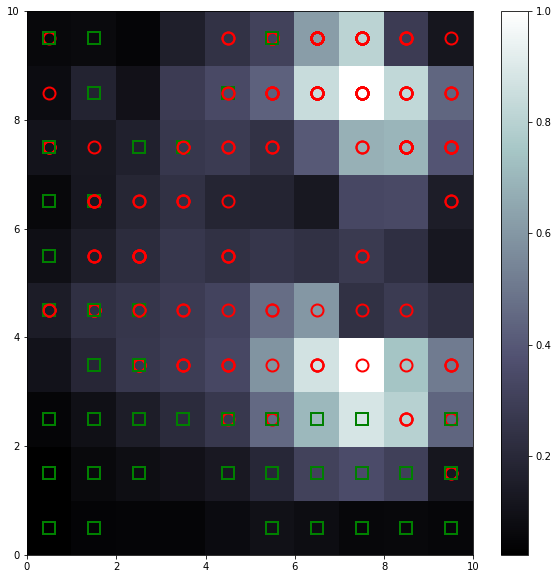

In [29]:
plt.figure(figsize=(10,10))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['r','g','b']

for i,xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=12,
        markeredgewidth=2)
show()

In [27]:
def train_som(x,y, input_len, sigma, learning_rate):
    som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              sigma=sigma,
              learning_rate=learning_rate)
    som.random_weights_init(data)
    start_time = time.time()
    som.train_random(data, iterations)
    elapsed_time= time.time()- start_time
    print(elapsed_time, "s")
    return som

def plot_som(som):
    plt.figure(figsize=(10,10))
    bone()
    pcolor(som.distance_map().T)
    colorbar()

    markers = ['o','s','D']
    colors = ['r','g','b']

    for i,xx in enumerate(data):
        w = som.winner(xx)
        plot(w[0]+.5,
             w[1]+.5,
             markers[target[i]],
            markeredgecolor=colors[target[i]],
            markerfacecolor='None',
            markersize=12,
            markeredgewidth=2)
    axis([0,som._weights.shape[0],0,som._weights.shape[1]])
    show()


In [28]:
rows_data = data.shape[0]

x = int(np.sqrt(5*np.sqrt(rows_data)))
y=x

input_len = data.shape[1]
sigma = 0.003
learning_rate=5
iterations = 100
print("x is {}".format(x))


x is 10


In [30]:
som = train_som(x,y,input_len,5,learning_rate)

0.009868621826171875 s


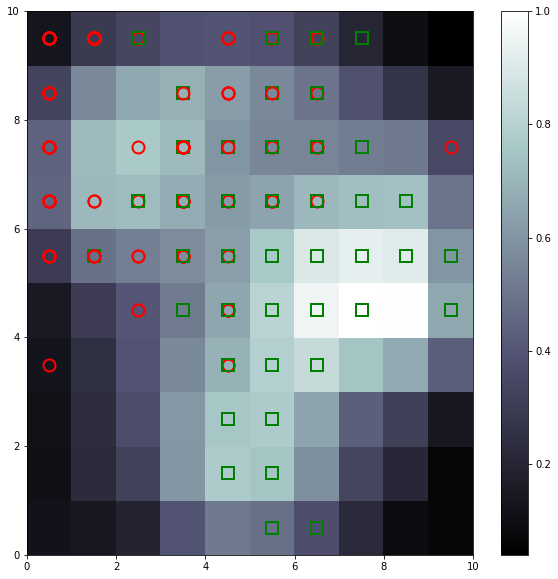

In [31]:
plot_som(som)

# Optimización bayesiana

## optimizando el radio de la vecindad, sigma

In [33]:
start_time = time.time()

best = fmin(
    fn = lambda sig: MiniSom(x=x,
                             y=y,
                             input_len=input_len,
                             sigma=sig,
                             learning_rate=learning_rate).quantization_error(data),
    space = hp.uniform("sig", 0.001 , x/2.01),
    algo = tpe.suggest,
    max_evals = 200)

elapsed_time = time.time() - start_time

print(elapsed_time, "s")
print(best)

100%|██████████| 200/200 [00:02<00:00, 81.51trial/s, best loss: 1111.1880881381476]
2.459871768951416 s
{'sig': 1.079388754501447}


In [34]:
sigma = best['sig']

In [36]:
som = train_som(x,y,input_len,sigma,learning_rate)

0.00988316535949707 s


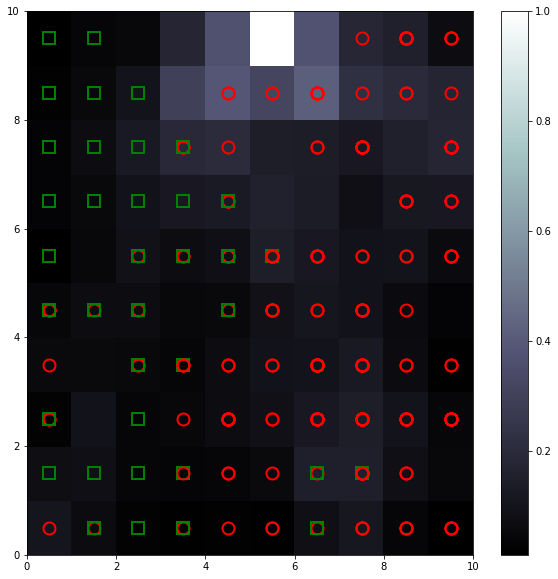

In [37]:
plot_som(som)

## optimizando la constante de aprendizaje

In [38]:
from hyperopt import Trials, STATUS_OK

In [39]:
space = {
    'sig': hp.uniform('sig', 0.001, 5),
    'learning_rate': hp.uniform('learning_rate', 0.001, 5)
    
}

In [40]:
def som_fn(space):
    sig = space['sig']
    learning_rate = space['learning_rate']
    val = MiniSom(x=x,
                 y=y,
                 input_len=input_len,
                 sigma=sig,
                 learning_rate=learning_rate).quantization_error(data)
    print(val)
    return {'loss': val, 'status':STATUS_OK} 
    

In [41]:
start_time = time.time()

trials = Trials()

best = fmin(
    fn = som_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 200,
    trials = trials)

elapsed_time = time.time() - start_time

print(elapsed_time, "s")
print('best:{}'.format(best))

1111.2792149451539                                     
1111.286480093788                                      
1111.3178782096893                                                               
1111.1981425108443                                                               
1111.241485213862                                                                
1111.267236988418                                                                
1111.2670550619064                                                               
1111.3388308914766                                                               
1111.3355895833347                                                               
1111.2202402951593                                                               
1111.289887367824                                                                
1111.2973177153704                                                                
1111.2410011733452                                                 

In [42]:
for i, trial in enumerate(trials.trials[:2]):
    print(i,trial)

0 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 1111.2792149451539, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'learning_rate': [0], 'sig': [0]}, 'vals': {'learning_rate': [2.421277695549428], 'sig': [1.7786718452015364]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 6, 25, 4, 45, 22, 372000), 'refresh_time': datetime.datetime(2020, 6, 25, 4, 45, 22, 389000)}
1 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 1111.286480093788, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'learning_rate': [1], 'sig': [1]}, 'vals': {'learning_rate': [3.844369395167663], 'sig': [1.5741489998743887]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 6, 25, 4, 45, 22, 394000), 'refresh_time': datetime.datetime(2020, 6, 25, 4, 45, 22, 415000)}


In [43]:
sigma = best['sig']
learning_rate=best['learning_rate']

In [44]:
som = train_som(x,y,input_len,sigma,learning_rate)

0.019826412200927734 s


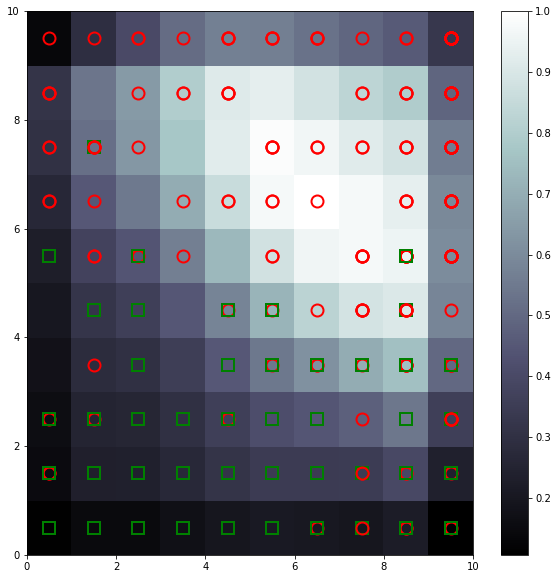

In [45]:
plot_som(som)

# Esto es para una nueva sección

In [ ]:
import csv
import json
import sys
#import pandas as pd
from business import intel
csv.field_size_limit(sys.maxsize)
request_data_json = []
with open ('score_requests_15062020.csv', newline='') as csvfile:
    cursor = csv.DictReader(csvfile)
    for row in cursor:
        try:
            request_data_json.append(json.loads(row['request_data']))
        except e:
            print(e)
            
xx, yy, zz = intel.get_dataframes_from_all_json(request_data_json)
# COnvertir estos DataFrames en CSV o Exportarlos a algo util :D
print(xx.shape)
print(yy.shape)
print(zz.shape)

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal = StandardScaler().fit_transform(df[X_cuentas].values)
pca.fit_transform(x_scal)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal_r = StandardScaler().fit_transform(df[X_respons].values)
pca.fit_transform(x_scal_r)